In [34]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
# GET THE DATAFRAME.

import pandas as pd

# df_path = "../../data/raw/debunking_review.tsv"
df_path = "../../data/raw/hedges-all.tsv"
# df_path = "../../data/raw/studytype_multiclass.tsv"
df = pd.read_csv(df_path, sep="\t")

In [39]:
# PERFORM DATA PROCESSING (LEMATIZATION ETC), GET TFIDF SCORES AND FEATURE NAMES.
# COULD be parallelised
from eppi_text_classification import (
    get_features,
    get_labels,
    get_tfidf_and_names,
)

word_features = get_features(
    df,
    title_key="ti",
    abstract_key="ab",
    # title_key="TI",
    # abstract_key="AB",
)


number of processes: 12
number of processes: 12


In [40]:
labels = get_labels(
    df,
    label_column_name="is_rct",
    positive_class_value="1",
    # label_column_name="Class",
    # positive_class_value="CaseControlStudies",
)
tfidf_scores, feature_names = get_tfidf_and_names(word_features)

In [5]:
from eppi_text_classification import OptunaHyperparameterOptimisation

# user_selected_hyperparameters = {
#     "booster": {"value": "gblinear", "suggest_type": "singular"}
# }

# user_selected_hyperparameters = {
#     # "scale_pos_weight": {"value": 27, "suggest_type": "singular"},
#     "reg_lambda": {"low": 0.0000001, "high": 100, "log": True, "suggest_type": "float"},
#     "reg_alpha": {"low": 0.0000001, "high": 100, "log": True, "suggest_type": "float"},
#     # "learning_rate": {"value": 0.54507787503025981, "suggest_type": "singular"},
#     # "learning_rate": {"low": 1e-2, "high": 1, "log": True, "suggest_type": "float"},
#     "n_estimators": {"value": 200, "suggest_type": "singular"},
#     "validate_parameters": {"value": True, "suggest_type": "singular"},
#     "enable_categorical": {"value": False, "suggest_type": "singular"},
#     "booster": {"value": "gblinear", "suggest_type": "singular"},
# } 0.9740

# user_selected_hyperparameters = {
#     # "scale_pos_weight": {"value": 27, "suggest_type": "singular"},
#     "reg_lambda": {
#         "low": 0.000000001,
#         "high": 10000,
#         "log": True,
#         "suggest_type": "float",
#     },
#     "reg_alpha": {
#         "value": 0.0000001,
#         "suggest_type": "singular",
#     },
#     # "learning_rate": {"value": 0.54507787503025981, "suggest_type": "singular"},
#     # "learning_rate": {"low": 1e-2, "high": 1, "log": True, "suggest_type": "float"},
#     "n_estimators": {"value": 200, "suggest_type": "singular"},
#     "validate_parameters": {"value": True, "suggest_type": "singular"},
#     "enable_categorical": {"value": False, "suggest_type": "singular"},
#     "booster": {"value": "gblinear", "suggest_type": "singular"},
# }  # 0.9748

# user_selected_hyperparameters = {
#     # "scale_pos_weight": {"value": 27, "suggest_type": "singular"},
#     "reg_lambda": {
#         "low": 0.00000000001,
#         "high": 10000,
#         "log": True,
#         "suggest_type": "float",
#     },
#     "reg_alpha": {
#         "low": 0.00000000001,
#         "high": 10000,
#         "log": True,
#         "suggest_type": "float",
#     },
#     # "learning_rate": {"value": 0.54507787503025981, "suggest_type": "singular"},
#     # "learning_rate": {"low": 1e-2, "high": 1, "log": True, "suggest_type": "float"},
#     "n_estimators": {"value": 200, "suggest_type": "singular"},
#     "validate_parameters": {"value": True, "suggest_type": "singular"},
#     "enable_categorical": {"value": False, "suggest_type": "singular"},
#     "booster": {"value": "gblinear", "suggest_type": "singular"},
# } #9740
# user_selected_hyperparameters = {
#     # "scale_pos_weight": {"value": 27, "suggest_type": "singular"},
#     "reg_lambda": {
#         "low": 0.00000000001,
#         "high": 10000,
#         "log": True,
#         "suggest_type": "float",
#     },
#     "reg_alpha": {
#         "low": 0.00000000001,
#         "high": 10000,
#         "log": True,
#         "suggest_type": "float",
#     },
#     "learning_rate": {"low": 1e-8, "high": 1, "log": True, "suggest_type": "float"},
#     "n_estimators": {"value": 200, "suggest_type": "singular"},
#     "validate_parameters": {"value": True, "suggest_type": "singular"},
#     "enable_categorical": {"value": False, "suggest_type": "singular"},
#     "booster": {"value": "gblinear", "suggest_type": "singular"},  # 0.9771
# }
# user_selected_hyperparameters = {
#     # "scale_pos_weight": {"value": 27, "suggest_type": "singular"},
#     "reg_lambda": {
#         "low": 0.000001,
#         "high": 10,
#         "log": True,
#         "suggest_type": "float",
#     },
#     "reg_alpha": {
#         "low": 0.000001,
#         "high": 10,
#         "log": True,
#         "suggest_type": "float",
#     },
#     "learning_rate": {"low": 1e-8, "high": 1, "log": True, "suggest_type": "float"},
#     "n_estimators": {"low": 100, "high": 1500, "log": False, "suggest_type": "int"},
#     # "n_estimators": {"value": 200, "suggest_type": "singular"},
#     "validate_parameters": {"value": True, "suggest_type": "singular"},
#     "enable_categorical": {"value": False, "suggest_type": "singular"},
#     "booster": {"value": "gblinear", "suggest_type": "singular"},  # 0.9771
# }

# user_selected_hyperparameters = {
#     # "scale_pos_weight": {"value": 27, "suggest_type": "singular"},
#     "reg_lambda": {
#         "low": 0.000001,
#         "high": 10,
#         "log": True,
#         "suggest_type": "float",
#     },
#     "reg_alpha": {
#         "low": 0.000001,
#         "high": 10,
#         "log": True,
#         "suggest_type": "float",
#     },
#     "learning_rate": {"low": 1e-8, "high": 1, "log": True, "suggest_type": "float"},
#     "n_estimators": {"low": 100, "high": 1500, "log": False, "suggest_type": "int"},
#     # "n_estimators": {"value": 200, "suggest_type": "singular"},
#     "validate_parameters": {"value": True, "suggest_type": "singular"},
#     "enable_categorical": {"value": False, "suggest_type": "singular"},
#     "booster": {"value": "gblinear", "suggest_type": "singular"},  # 0.9769
# }
user_selected_hyperparameters = {
    # "scale_pos_weight": {"value": 27, "suggest_type": "singular"},
    "reg_lambda": {
        "low": 0.000001,
        "high": 10,
        "log": True,
        "suggest_type": "float",
    },
    "reg_alpha": {
        "low": 0.000001,
        "high": 10,
        "log": True,
        "suggest_type": "float",
    },
    # "learning_rate": {"low": 1e-8, "high": 1, "log": True, "suggest_type": "float"},
    # "n_estimators": {"low": 100, "high": 2500, "log": False, "suggest_type": "int"},
    "n_estimators": {"value": 200, "suggest_type": "singular"},
    "validate_parameters": {"value": True, "suggest_type": "singular"},
    "enable_categorical": {"value": False, "suggest_type": "singular"},
    "booster": {"value": "gblinear", "suggest_type": "singular"},
}
optimiser = OptunaHyperparameterOptimisation(
    tfidf_scores,
    labels,
    "xgboost",
    max_n_search_iterations=1000,
    n_jobs=-1,
    nfolds=3,
    num_cv_repeats=1,
    # db_url=f"sqlite:////mnt/tmp/optuna.db", #Use this one on Azure
    db_url=None,
    user_selected_hyperparameter_ranges=user_selected_hyperparameters,
    use_early_terminator=True,
)

optimiser.delete_optuna_study("xgb_binary")
best_params = optimiser.optimise_hyperparameters(study_name="xgb_binary")


Number of processes: 12
sqlite:////Users/sjmolyneux/Documents/EPPI_Classification_Public/eppi_text_classification/optuna.db
final ranges: {'n_estimators': {'value': 200, 'suggest_type': 'singular'}, 'max_depth': {'low': 1, 'high': 5, 'log': False, 'suggest_type': 'int'}, 'reg_lambda': {'low': 1e-06, 'high': 10, 'log': True, 'suggest_type': 'float'}, 'reg_alpha': {'low': 1e-06, 'high': 10, 'log': True, 'suggest_type': 'float'}, 'learning_rate': {'low': 0.01, 'high': 1, 'log': True, 'suggest_type': 'float'}, 'booster': {'value': 'gblinear', 'suggest_type': 'singular'}, 'tree_method': {'value': 'approx', 'suggest_type': 'singular'}, 'feature_selector': {'value': 'cyclic', 'suggest_type': 'singular'}, 'verbosity': {'value': 2, 'suggest_type': 'singular'}, 'validate_parameters': {'value': True, 'suggest_type': 'singular'}, 'enable_categorical': {'value': False, 'suggest_type': 'singular'}}
Positive class weight: 27.363636363636363


[I 2025-02-15 14:14:38,578] A new study created in RDB with name: xgb_binary
/Users/sjmolyneux/Documents/EPPI_Classification_Public/eppi_text_classification/eppi_text_classification/single_process_opt.py:415: ExperimentalWarning: RegretBoundEvaluator is experimental (supported from v3.2.0). The interface can change in the future.
  improvement_evaluator=RegretBoundEvaluator(),
/Users/sjmolyneux/Documents/EPPI_Classification_Public/eppi_text_classification/eppi_text_classification/single_process_opt.py:416: ExperimentalWarning: CrossValidationErrorEvaluator is experimental (supported from v3.2.0). The interface can change in the future.
  error_evaluator=CrossValidationErrorEvaluator(),
/Users/sjmolyneux/Documents/EPPI_Classification_Public/eppi_text_classification/eppi_text_classification/single_process_opt.py:414: ExperimentalWarning: Terminator is experimental (supported from v3.2.0). The interface can change in the future.
  terminator = Terminator(
/Users/sjmolyneux/Documents/EPPI_

Finished trial with scores: [0.5, 0.5, 0.5]
Finished trial with scores: [0.5, 0.5, 0.5]
Finished trial with scores: [0.5, 0.5, 0.5]
Finished trial with scores: [0.5, 0.5, 0.5]
Finished trial with scores: [0.5, 0.5, 0.5]
Finished trial with scores: [0.49226932668329176, 0.5, 0.6231343283582089]
Finished trial with scores: [0.5, 0.5, 0.5]


[I 2025-02-15 14:14:39,278] Trial 0 finished with value: 0.5 and parameters: {'reg_lambda': 8.073912460219155e-06, 'reg_alpha': 1.9163292222040886, 'learning_rate': 0.010454387236644089}. Best is trial 0 with value: 0.5.
[I 2025-02-15 14:14:39,352] Trial 3 finished with value: 0.5 and parameters: {'reg_alpha': 0.7537673339015912, 'reg_lambda': 0.0002074652407876166, 'learning_rate': 0.14078841366998657}. Best is trial 0 with value: 0.5.
[I 2025-02-15 14:14:39,381] Trial 5 finished with value: 0.5 and parameters: {'reg_lambda': 0.00013134229039164774, 'reg_alpha': 2.5220843641236312, 'learning_rate': 0.07655169195072138}. Best is trial 0 with value: 0.5.
[I 2025-02-15 14:14:39,394] Trial 1 finished with value: 0.5 and parameters: {'reg_alpha': 0.10987362090329122, 'reg_lambda': 3.6368813617148463, 'learning_rate': 0.25906017448712565}. Best is trial 0 with value: 0.5.
[I 2025-02-15 14:14:39,452] Trial 4 finished with value: 0.5 and parameters: {'reg_alpha': 0.17534055802351162, 'reg_lam

Finished trial with scores: [0.5, 0.5, 0.5]
Finished trial with scores: [0.8543640897755611, 0.8940980881130507, 0.9038734896943851]
Finished trial with scores: [0.9073981712385704, 0.9597672485453033, 0.9850746268656717]
Finished trial with scores: [0.9158769742310889, 0.9487946799667498, 0.982409381663113]
Finished trial with scores: [0.5, 0.5, 0.5]
Finished trial with scores: [0.8974231088944307, 0.9541147132169576, 0.9820540156361052]
Finished trial with scores: [0.5, 0.5, 0.5]
Finished trial with scores: [0.5, 0.5, 0.5]
Finished trial with scores: [0.8457190357439733, 0.9220282626766418, 0.9575337597725657]


[I 2025-02-15 14:14:39,488] Trial 10 finished with value: 0.5 and parameters: {'reg_alpha': 2.87138732815298, 'reg_lambda': 0.10553671170029481, 'learning_rate': 0.8549319342750366}. Best is trial 6 with value: 0.5384678850138336.
[I 2025-02-15 14:14:39,510] Trial 11 finished with value: 0.8841118891943323 and parameters: {'reg_alpha': 0.00558635095222791, 'reg_lambda': 6.682943935817223e-05, 'learning_rate': 0.050714516706085296}. Best is trial 11 with value: 0.8841118891943323.
[I 2025-02-15 14:14:39,519] Trial 8 finished with value: 0.9490270119536506 and parameters: {'reg_alpha': 7.067647333021805e-05, 'reg_lambda': 0.0016511010487709895, 'learning_rate': 0.03834194663440111}. Best is trial 8 with value: 0.9490270119536506.
[I 2025-02-15 14:14:39,527] Trial 7 finished with value: 0.5 and parameters: {'reg_alpha': 0.04157411164905427, 'learning_rate': 0.03915195146036714, 'reg_lambda': 3.2918684799363067}. Best is trial 9 with value: 0.950746682216515.
[I 2025-02-15 14:14:39,534] Tr

Finished trial with scores: [0.8826267664172902, 0.9496259351620947, 0.9790334044065387]
Finished trial with scores: [0.9221945137157107, 0.9246882793017457, 0.9816986496090974]
Finished trial with scores: [0.9183707398171239, 0.9391521197007482, 0.9820540156361052]
Finished trial with scores: [0.9197007481296758, 0.9358270989193683, 0.9815209665955935]
Finished trial with scores: [0.9050706566916045, 0.9489609310058188, 0.9816986496090974]
Finished trial with scores: [0.9215295095594348, 0.9303408146300914, 0.9815209665955935]
Finished trial with scores: [0.9216957605985038, 0.9280133000831254, 0.9815209665955935]
Finished trial with scores: [0.9075644222776393, 0.886616791354946, 0.9635749822316987]


[I 2025-02-15 14:14:39,799] Trial 16 finished with value: 0.9370953686619745 and parameters: {'reg_alpha': 7.636978552666073e-05, 'reg_lambda': 0.2715829676875854, 'learning_rate': 0.09389968510127689}. Best is trial 9 with value: 0.950746682216515.
[I 2025-02-15 14:14:39,889] Trial 18 finished with value: 0.942860480875518 and parameters: {'reg_alpha': 5.209136277300828e-06, 'reg_lambda': 0.0033701763386325932, 'learning_rate': 0.01540049762214222}. Best is trial 9 with value: 0.950746682216515.
[I 2025-02-15 14:14:39,898] Trial 21 finished with value: 0.9465256250513258 and parameters: {'reg_alpha': 5.416050221551236e-06, 'learning_rate': 0.021822597204349262, 'reg_lambda': 0.004194355423318795}. Best is trial 9 with value: 0.950746682216515.
[I 2025-02-15 14:14:39,913] Trial 17 finished with value: 0.9452434124355068 and parameters: {'reg_alpha': 1.8526670841788364e-05, 'reg_lambda': 0.010075669087661195, 'learning_rate': 0.02744126099963425}. Best is trial 9 with value: 0.950746682

Finished trial with scores: [0.9068994181213632, 0.8872817955112219, 0.9646410803127221]
Finished trial with scores: [0.8753117206982544, 0.8640066500415627, 0.9362117981520965]
Finished trial with scores: [0.9236907730673316, 0.9240232751454697, 0.9816986496090974]
Finished trial with scores: [0.9238570241064006, 0.9245220282626767, 0.9816986496090974]
Finished trial with scores: [0.9236907730673316, 0.9206982543640898, 0.9808102345415779]
Finished trial with scores: [0.9059019118869492, 0.9587697423108895, 0.9847192608386639]
Finished trial with scores: [0.9238570241064007, 0.9308395677472985, 0.9800995024875622]
Finished trial with scores: [0.9213632585203658, 0.9386533665835411, 0.9818763326226012]
Finished trial with scores: [0.9231920199501247, 0.9348295926849544, 0.9813432835820896]
Finished trial with scores: [0.9260182876142976, 0.9223607647547797, 0.9749466950959489]
Finished trial with scores: [0.9057356608478803, 0.9582709891936824, 0.9848969438521677]
Finished trial with s

[I 2025-02-15 14:14:40,271] Trial 29 finished with value: 0.9497969716788343 and parameters: {'reg_alpha': 4.9839930277658084e-05, 'reg_lambda': 0.000539465340946918, 'learning_rate': 0.8303831545141835}. Best is trial 9 with value: 0.950746682216515.
[I 2025-02-15 14:14:40,311] Trial 30 finished with value: 0.9449320314470872 and parameters: {'reg_alpha': 0.00010327239611617161, 'learning_rate': 0.030072469395115323, 'reg_lambda': 0.0007140994847270657}. Best is trial 9 with value: 0.950746682216515.
[I 2025-02-15 14:14:40,356] Trial 32 finished with value: 0.9472976525755028 and parameters: {'reg_alpha': 7.691148320617537e-05, 'learning_rate': 0.035818143566030115, 'reg_lambda': 0.0008247086696866059}. Best is trial 9 with value: 0.950746682216515.
[I 2025-02-15 14:14:40,371] Trial 33 finished with value: 0.9464549654057229 and parameters: {'reg_alpha': 9.846241508043281e-05, 'reg_lambda': 0.0008439628987592465, 'learning_rate': 0.031837076271289316}. Best is trial 9 with value: 0.95

Finished trial with scores: [0.8896093100581879, 0.9522859517871987, 0.9811656005685856]
Finished trial with scores: [0.8904405652535328, 0.9517871986699917, 0.9815209665955935]
Finished trial with scores: [0.8899418121363258, 0.9521197007481297, 0.9815209665955935]
Finished trial with scores: [0.8995843724023276, 0.9416458852867831, 0.9802771855010661]
Finished trial with scores: [0.8944305901911886, 0.9448046550290939, 0.9804548685145701]


[I 2025-02-15 14:14:40,497] Trial 36 finished with value: 0.9412495768397061 and parameters: {'reg_lambda': 0.040861934051756275, 'reg_alpha': 6.0444701000216356e-05, 'learning_rate': 0.4602586572940399}. Best is trial 9 with value: 0.950746682216515.
[I 2025-02-15 14:14:40,500] Trial 37 finished with value: 0.941020287471324 and parameters: {'reg_alpha': 7.759378127655219e-05, 'reg_lambda': 0.041008481636420194, 'learning_rate': 0.45963551397747016}. Best is trial 9 with value: 0.950746682216515.
[I 2025-02-15 14:14:40,532] Trial 38 finished with value: 0.941194159826683 and parameters: {'reg_lambda': 0.0403418940870284, 'reg_alpha': 7.356843640015174e-05, 'learning_rate': 0.4551214133220153}. Best is trial 9 with value: 0.950746682216515.
[I 2025-02-15 14:14:40,599] Trial 40 finished with value: 0.9405024810633922 and parameters: {'reg_alpha': 8.383715827261175e-05, 'reg_lambda': 0.022819715454299377, 'learning_rate': 0.010012572914802622}. Best is trial 9 with value: 0.9507466822165

Finished trial with scores: [0.8814630091438072, 0.9386533665835413, 0.9585998578535891]
Finished trial with scores: [0.8931005818786367, 0.9526184538653367, 0.9818763326226013]
Finished trial with scores: [0.8788029925187032, 0.9509559434746466, 0.9793887704335466]
Finished trial with scores: [0.8907730673316708, 0.9398171238570241, 0.9657071783937455]
Finished trial with scores: [0.8857855361596011, 0.9512884455527847, 0.9797441364605544]
Finished trial with scores: [0.888279301745636, 0.941812136325852, 0.9614427860696517]
Finished trial with scores: [0.8753117206982544, 0.9502909393183707, 0.9783226723525231]
Finished trial with scores: [0.9030756442227764, 0.9506234413965087, 0.9749466950959489]
Finished trial with scores: [0.8960931005818786, 0.946134663341646, 0.9708599857853589]
Finished trial with scores: [0.9010806317539484, 0.9511221945137158, 0.9747690120824449]


[I 2025-02-15 14:14:40,711] Trial 42 finished with value: 0.9425317894555248 and parameters: {'reg_alpha': 5.666432604087104e-05, 'learning_rate': 0.8856773734099578, 'reg_lambda': 0.030412981212779848}. Best is trial 9 with value: 0.950746682216515.
[I 2025-02-15 14:14:40,714] Trial 43 finished with value: 0.9262387445269792 and parameters: {'reg_alpha': 0.0006746023035050996, 'learning_rate': 0.5984610178813987, 'reg_lambda': 5.6511587477365096e-05}. Best is trial 9 with value: 0.950746682216515.
[I 2025-02-15 14:14:40,719] Trial 44 finished with value: 0.9363825688089654 and parameters: {'reg_alpha': 0.0004943594135776463, 'reg_lambda': 0.030400635480939117, 'learning_rate': 0.8627198679778914}. Best is trial 9 with value: 0.950746682216515.
[I 2025-02-15 14:14:40,781] Trial 45 finished with value: 0.9320991231941469 and parameters: {'reg_alpha': 0.0005577323785212749, 'reg_lambda': 6.875439196560449e-05, 'learning_rate': 0.4441445863472139}. Best is trial 9 with value: 0.9507466822

Finished trial with scores: [0.8995843724023276, 0.9497921862011638, 0.972636815920398]
Ending process, stopping_event set.
Finished trial with scores: [0.9010806317539484, 0.9509559434746468, 0.9742359630419333]
Ending process, stopping_event set.
Finished trial with scores: [0.8955943474646716, 0.9536159600997506, 0.9829424307036247]
Ending process, stopping_event set.
Finished trial with scores: [0.9050706566916042, 0.9614297589359934, 0.9850746268656716]
Ending process, stopping_event set.
Finished trial with scores: [0.9059019118869492, 0.9614297589359934, 0.9848969438521677]
Ending process, stopping_event set.
Finished trial with scores: [0.9057356608478804, 0.9599334995843724, 0.9848969438521677]
Ending process, stopping_event set.
Finished trial with scores: [0.9049044056525354, 0.9614297589359934, 0.9850746268656717]
Ending process, stopping_event set.
Finished trial with scores: [0.9068994181213633, 0.9599334995843725, 0.9847192608386639]
Ending process, stopping_event set.
F

[I 2025-02-15 14:14:41,149] Trial 57 finished with value: 0.9504695971514002 and parameters: {'reg_alpha': 2.1657079536001465e-05, 'reg_lambda': 0.00016869119443944767, 'learning_rate': 0.2401305844449368}. Best is trial 9 with value: 0.950746682216515.
[I 2025-02-15 14:14:41,158] The study has been stopped by the terminator.
[I 2025-02-15 14:14:41,174] The study has been stopped by the terminator.
[I 2025-02-15 14:14:41,187] Trial 58 finished with value: 0.9505173928481332 and parameters: {'reg_lambda': 0.00029253974680774913, 'reg_alpha': 2.2759942062774056e-05, 'learning_rate': 0.20060872755070533}. Best is trial 9 with value: 0.950746682216515.
[I 2025-02-15 14:14:41,195] Trial 59 finished with value: 0.9495600609941622 and parameters: {'reg_alpha': 2.2428084760470225e-05, 'reg_lambda': 0.0019771101045446032, 'learning_rate': 0.2260676932818626}. Best is trial 9 with value: 0.950746682216515.
[I 2025-02-15 14:14:41,196] The study has been stopped by the terminator.
[I 2025-02-15 14

In [43]:
import optuna

study = optuna.create_study(
    study_name="xgb_binary",
    storage="sqlite:////Users/sjmolyneux/Documents/EPPI_Classification_Public/eppi_text_classification/optuna.db",
    direction="maximize",
    load_if_exists=True,
)

import jsonpickle

best_trial = study.best_trial
best_params = best_trial.user_attrs["all_params"]
best_params = jsonpickle.decode(best_params, keys=True)

[I 2025-02-20 10:29:25,678] Using an existing study with name 'xgb_binary' instead of creating a new one.


In [42]:
# FIT THE MODEL
import copy

from xgboost import XGBClassifier
from xgboost.callback import EarlyStopping
from sklearn.model_selection import train_test_split

# model = XGBClassifier(**best_params)

es = EarlyStopping(
    rounds=25,
    metric_name="logloss",
    maximize=False,
    save_best=True,
    data_name="validation_0",
)
# params = dict(
#     objective="binary:logistic",
#     eval_metric="logloss",
#     # colsample_bytree=1,
#     n_jobs=1,
#     # scale_pos_weight=42,
#     scale_pos_weight=27,
#     reg_lambda=0.00007636592766577953,
#     reg_alpha=0.0000834292094431529,
#     learning_rate=0.54507787503025981,
#     # learning_rate=0.0000054507787503025981,
#     # n_estimators=557,
#     n_estimators=500,
#     # min_child_weight=1,
#     # gamma=6.384905359051449e-10,
#     # max_depth=10,
#     # booster="gblinear",
#     # sample_type="weighted",
#     # verbosity=2,
#     validate_parameters=True,
#     # callbacks=[es],
#     enable_categorical=False,
#     booster="gblinear",
# )
params = copy.deepcopy(best_params)

X_train, X_test, y_train, y_test = train_test_split(
    tfidf_scores, labels, test_size=0.333, stratify=labels, random_state=8
)
# X_train = X_train.toarray()
# X_test = X_test.toarray()
import xgboost as xgb

num_boost_round = params.pop("n_estimators")
# enable categorical is always false
enable_categorical = params.pop("enable_categorical")
dtrain = xgb.DMatrix(
    X_train, label=y_train, enable_categorical=enable_categorical, missing=None
)
# xgboost.train ignores params it cannot use
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
)
if params["booster"] == "gblinear":  # remove booster from params
    model.set_attr(boosting_type="gblinear")


In [108]:
# CREATE ROC CURVE TO SELECT THRESHOLD

from eppi_text_classification.predict import predict_scores
from eppi_text_classification.plotly_roc import plotly_roc

y_test_pred_probs = predict_scores(model, X_test)
# print(y_test_pred_probs)
plotly_roc(y_test, y_test_pred_probs)

In [110]:
from eppi_text_classification.select_threshold_plot import select_threshold_plot

select_threshold_plot(y_test_pred_probs, y_test)

Generated HTML saved to select_threshold_plot.html


In [118]:
from eppi_text_classification.plotly_histogram import (
    postive_negative_scores_histogram_html,
)

postive_negative_scores_histogram_html(y_test_pred_probs, y_test, savepath="hist.html")

HTML file saved at hist.html


In [11]:
# GET MODEL THRESHOLD FOR CHOSEN TPR, MAKE PREDICTIONS

from eppi_text_classification.predict import (
    get_raw_threshold,
    raw_threshold_predict,
)


threshold = get_raw_threshold(model, X_test, y_test, target_tpr=0.970)

y_test_pred = raw_threshold_predict(model, X_test, threshold)
y_train_pred = raw_threshold_predict(model, X_train, threshold)

In [106]:
from eppi_text_classification.learning_curve_plot import create_learning_curve_html

create_learning_curve_html(
    tfidf_scores=tfidf_scores,
    labels=labels,
    model_name="xgboost",
    model_params=best_params,
    savepath="learning_curve.html",
)

Saved learning curve plot to learning_curve.html


In [119]:
from eppi_text_classification.model_stability import (
    predict_cv_metrics,
    predict_cv_scores,
)

auc_scores, recall_scores, specificity_scores = predict_cv_metrics(
    tfidf_scores=tfidf_scores,
    labels=labels,
    model_name="xgboost",
    model_params=best_params,
    nfolds=5,
    num_cv_repeats=100,
    threshold=threshold,
)
fold_scores = predict_cv_scores(
    tfidf_scores=tfidf_scores,
    labels=labels,
    model_name="xgboost",
    model_params=best_params,
    nfolds=5,
    num_cv_repeats=1,
)

In [78]:
from eppi_text_classification.plotly_histogram import create_histogram_html

create_histogram_html(
    auc_scores, "auc_histogram.html", title="AUC Scores", xaxis_title="AUC"
)
create_histogram_html(
    recall_scores,
    "recall_histogram.html",
    title="Recall Scores",
    xaxis_title="Recall",
    colour="rgba(50, 205, 50, 0.7)",
)
create_histogram_html(
    specificity_scores,
    "specificity_histogram.html",
    title="Specificity Scores",
    xaxis_title="Specificity",
    colour="rgb(251, 173, 60, 0.7)",
)

HTML file saved at auc_histogram.html
HTML file saved at recall_histogram.html
HTML file saved at specificity_histogram.html


In [133]:
from eppi_text_classification.box_plot import generate_box_plot_html

list_fold_scores = [list(fold) for fold in fold_scores]

generate_box_plot_html(
    data_list=list_fold_scores,
    name_list=["1", "2", "3", "4", "5"],
    title="AUC Scores",
    xaxis_title="AUC",
    yaxis_title="Fold",
    savepath="auc_boxplot.html",
)


HTML file saved at: auc_boxplot.html


In [134]:
from eppi_text_classification.box_plot import box_plot

box_plot(
    list_fold_scores,
    ["1", "2", "3", "4", "5"],
    title="Raw scores",
    yaxis_title="Score",
    xaxis_title="Fold",
)


In [18]:
from eppi_text_classification import binary_train_valid_confusion_plotly

binary_train_valid_confusion_plotly(
    y_train,
    y_train_pred,
    y_test,
    y_test_pred,
    postive_label="Included",
    negative_label="Excluded",
)

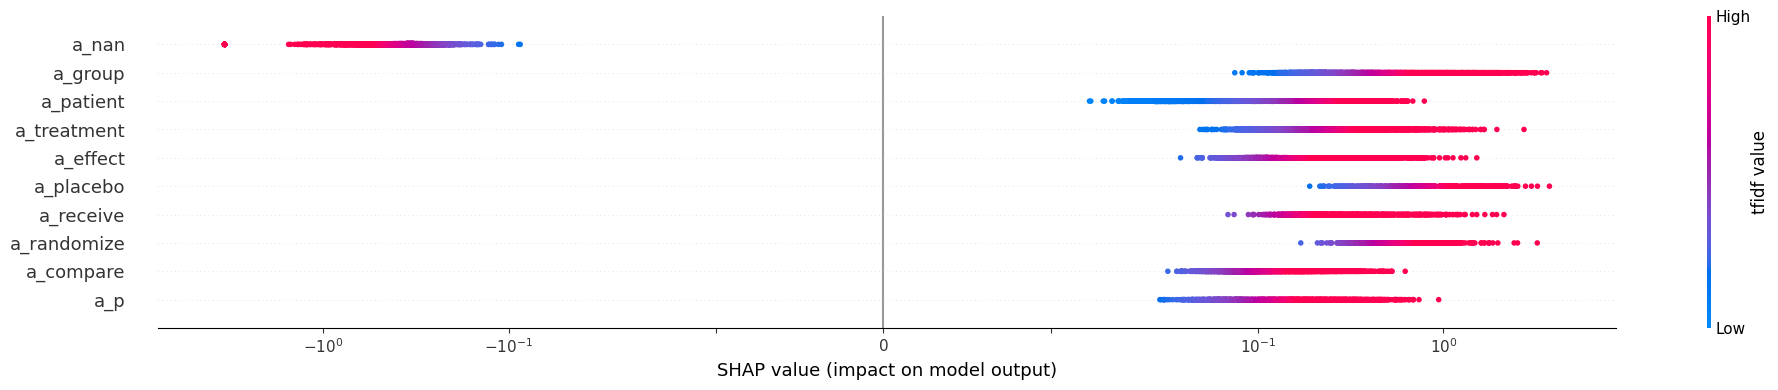

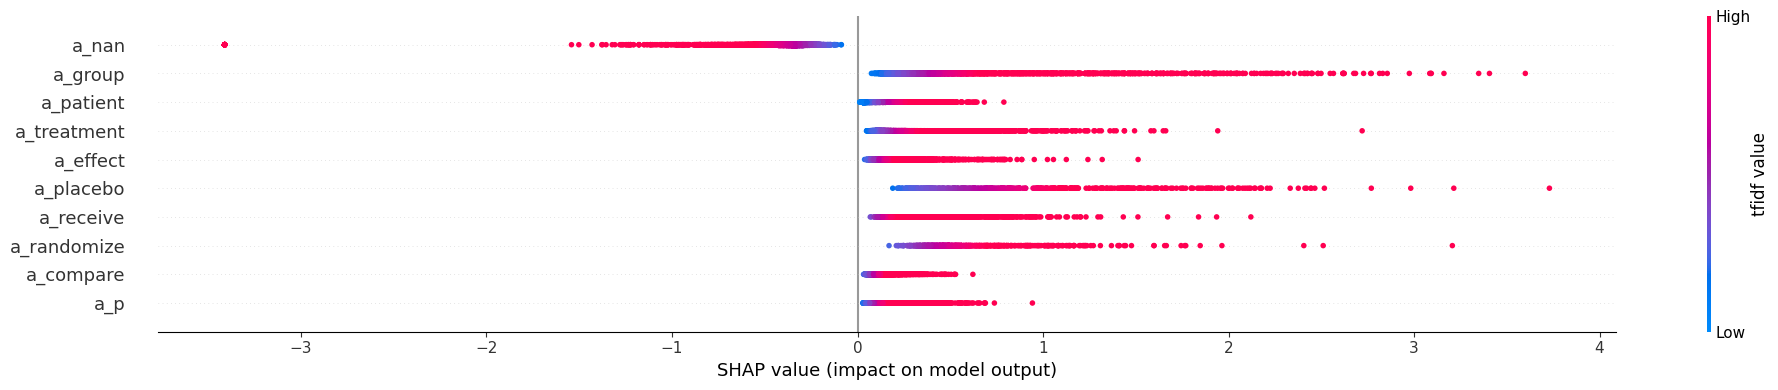

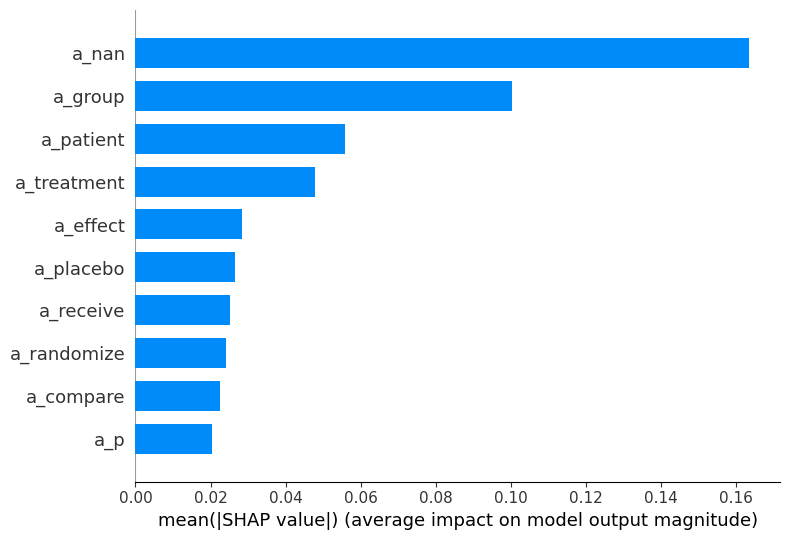

In [121]:
# EXLPAIN THE MODEL

from eppi_text_classification.shap_plotter import ShapPlotter

shap_plotter = ShapPlotter(
    model,
    X_test,
    feature_names,
)

dot_plot = shap_plotter.dot_plot(num_display=10)
dot_plot.show()
dot_plot = shap_plotter.dot_plot(num_display=10, log_scale=False)
dot_plot.show()
bar_plot = shap_plotter.bar_chart()
bar_plot.show()

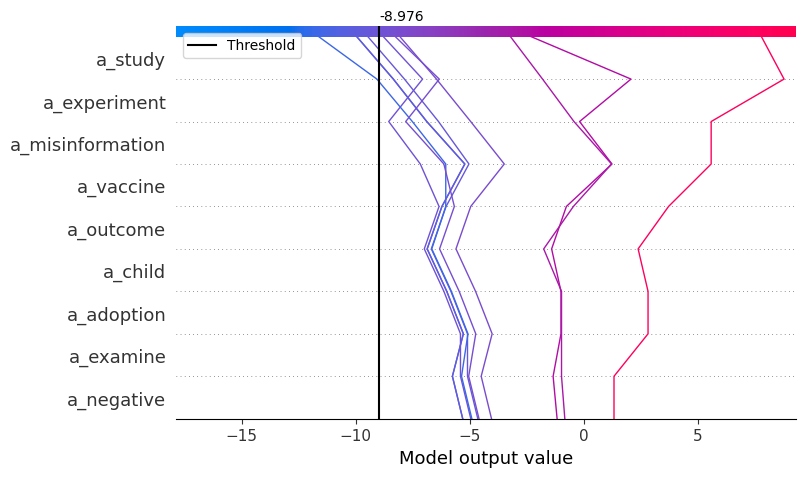

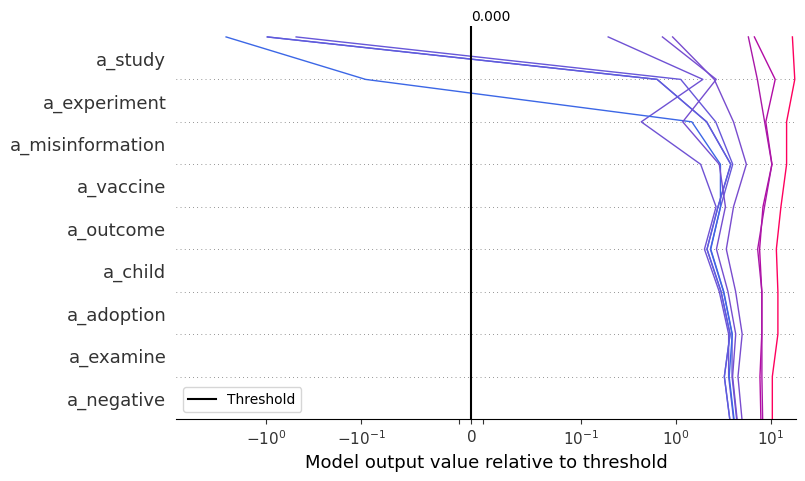

In [15]:
# MAKE THE DECISION PLOTS

from eppi_text_classification.shap_plotter import ShapPlotter

shap_plotter = ShapPlotter(
    model,
    X_test[:10],
    feature_names,
)
decision_plot = shap_plotter.decision_plot(threshold=threshold, num_display=10)
decision_plot.show()
decision_plot = shap_plotter.decision_plot(
    threshold=threshold, num_display=10, log_scale=True
)
decision_plot.show()

Truth: 0
Prediction: 1
Shap value: -8.782919133682864
Prediction score: -8.782930374145508


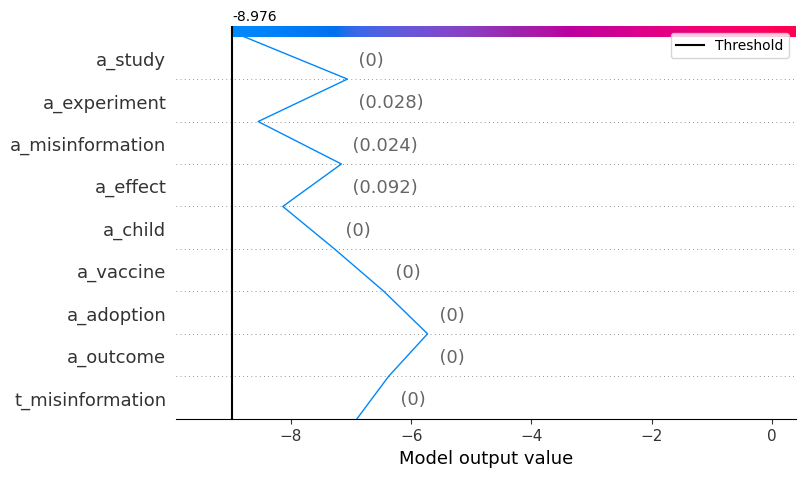

Truth: 0
Prediction: 1
Shap value: -2.3044823931019174
Prediction score: -2.304480791091919


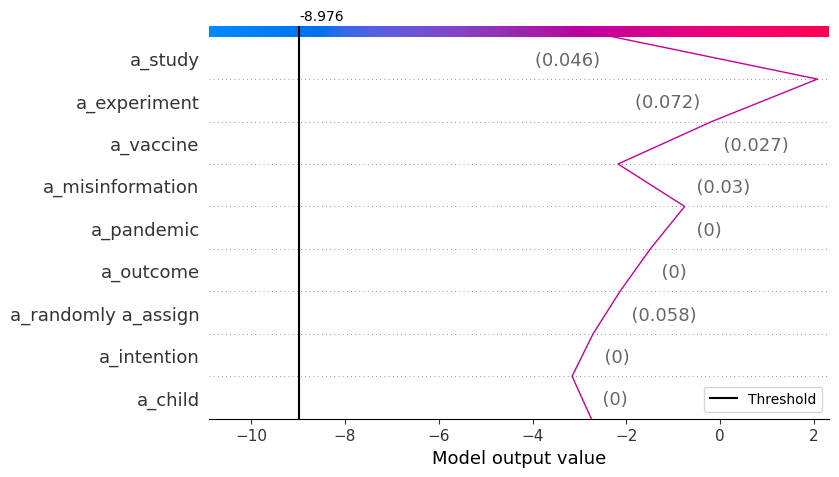

Truth: 0
Prediction: 0
Shap value: -9.947154385638552
Prediction score: -9.947152137756348


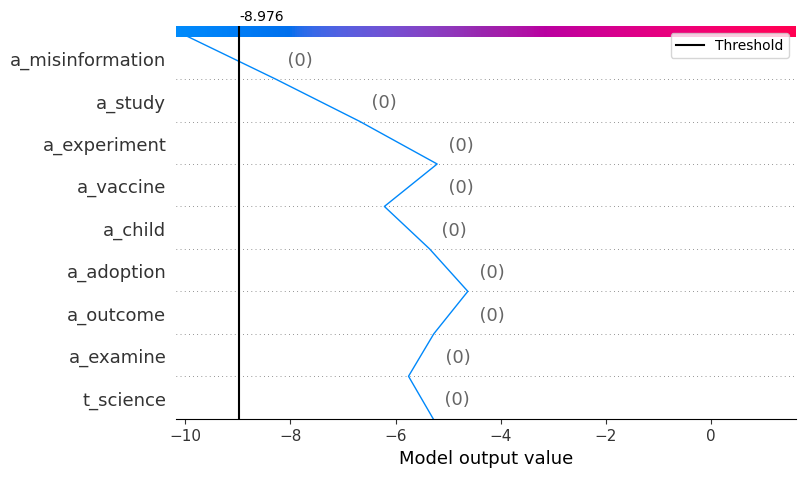

Truth: 0
Prediction: 1
Shap value: -8.056392162707763
Prediction score: -8.05639934539795


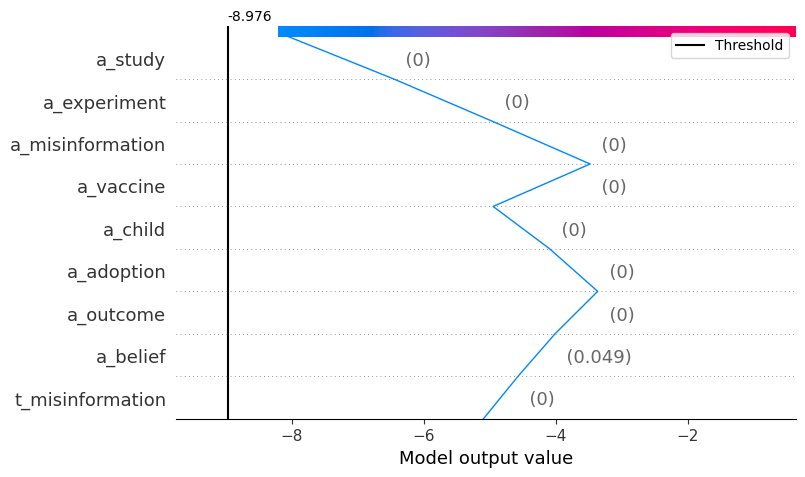

Truth: 0
Prediction: 0
Shap value: -9.459423726094084
Prediction score: -9.45942211151123


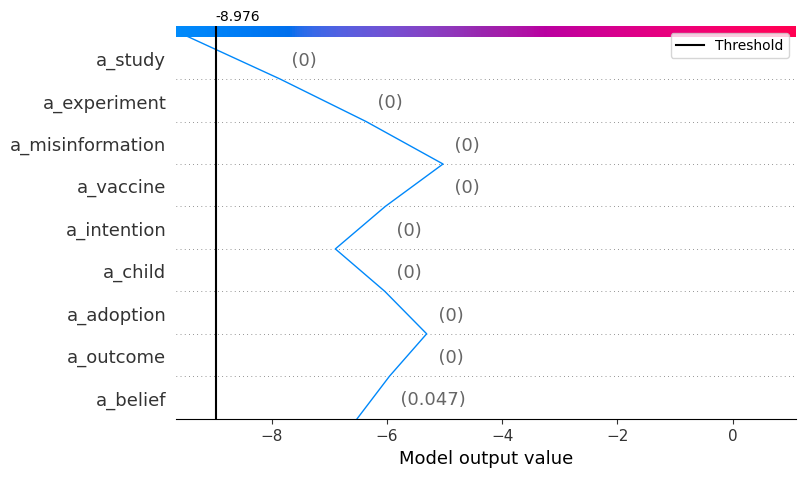

In [16]:
import numpy as np

for i in range(5):
    print(f"Truth: {y_test[i]}")
    print(f"Prediction: {raw_threshold_predict(model, X_test, threshold)[i]}")
    print(
        f"Shap value: {shap_plotter.shap_values[i].sum() + shap_plotter.expected_value}"
    )
    print(f"Prediction score: {predict_scores(model, X_test)[i]}")
    decision_plot = shap_plotter.single_decision_plot(
        threshold=threshold, index=i, num_display=10, log_scale=False
    )
    decision_plot.show()